첨부된 `heart` 데이터를 활용하여 환자의 심장마비를 예측하는 모델을 만드세요.

- `trtbps`, `oldpeak`, `chol`, `thalachh` 변수의 **이상치를 결측치(NA)**로 처리할 것.
- 결측치 변수는 모두 그 변수의 **median 값으로 대체**할 것.
- `trtbps`, `oldpeak`, `chol`, `thalachh` 변수들에 대해 **min-max scaling을 시행**할 것.
- **로지스틱 회귀분석 모델**을 만들 것.
    - test set: 30%
    - feature (독립변수): Target 변수를 제외한 모든 변수 활용.
    - seed 번호: 2022

In [1]:
setwd("C:/Users/alsdu/OneDrive/문서/카카오톡 받은 파일/20220424_데이터분석 스터디/20220424_데이터분석 스터디")

In [2]:
df<-read.csv("heart.csv")

# 1. Basic EDA

In [3]:
str(df)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : int  1 2 2 2 2 1 2 3 3 2 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


In [4]:
summary(df)

      age             sex               cp            trtbps     
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalachh    
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
      exng           oldpeak          slp             caa        
 Mi

1. 피처 모두 con vars
2. 스케일 다름

# 2. Data Preprocessing
-  `trtbps(4)`, `chol(5)`, `thalachh(8)`,`oldpeak(10)` 변수의 **이상치를 결측치(NA)**로 처리할 것.
- 결측치 변수는 모두 그 변수의 **median 값으로 대체**할 것.

## 2.1. Potential Outliers
- quantile 분포를 보고 raw data의 분포를 헤치지 않는 선에서 해결

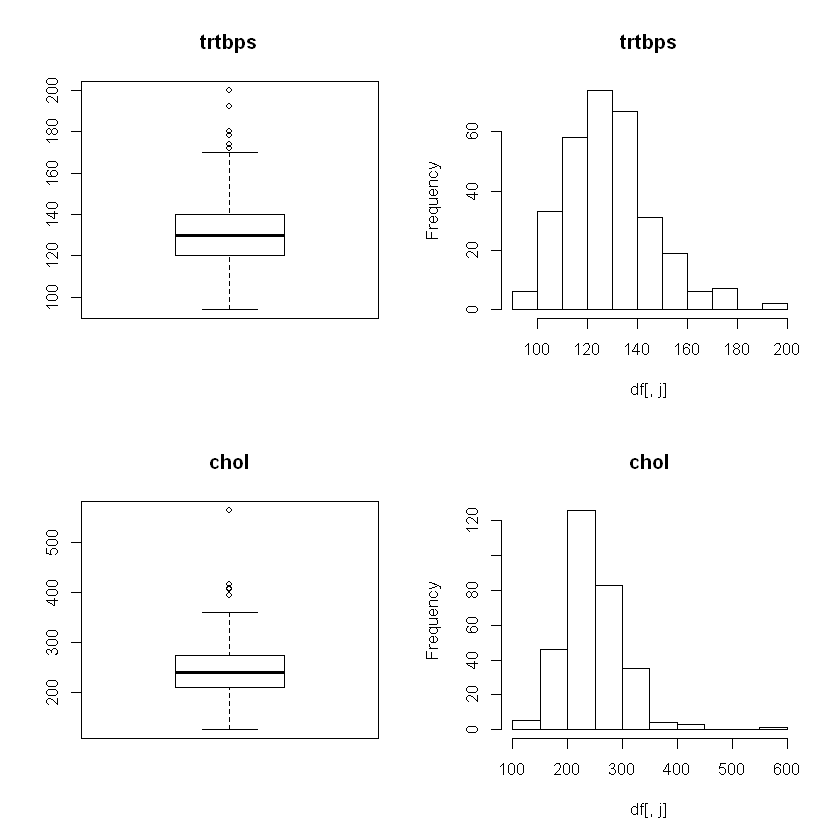

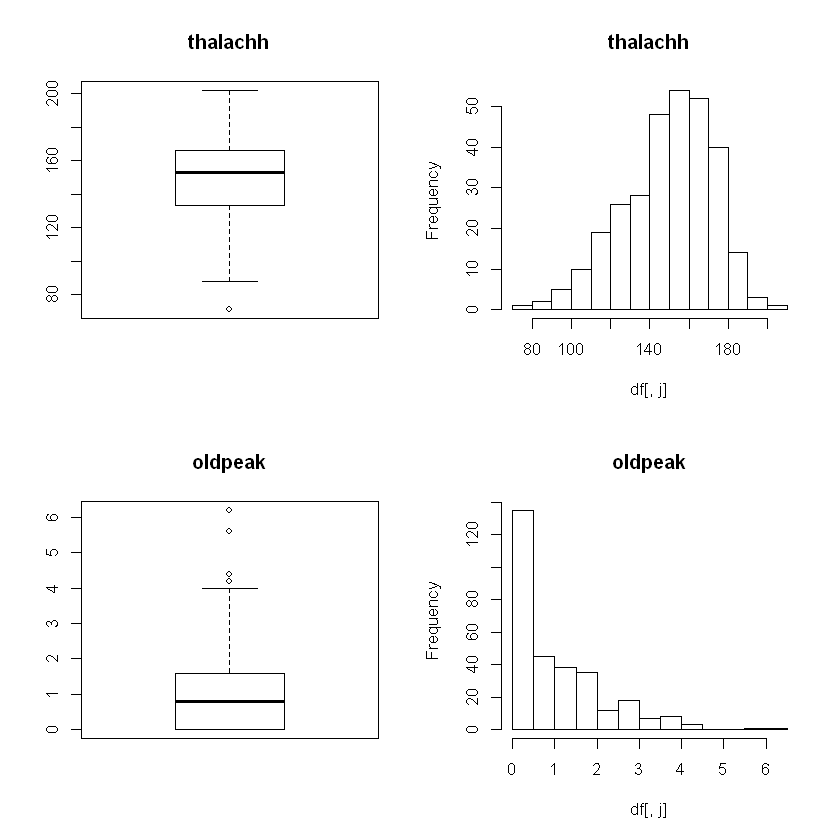

In [5]:
par(mfrow=c(2,2))

for (j in c(4:5, 8,10)) { 
boxplot(df[,j] , main=names(df)[j]  )  
hist(df[,j],  main=names(df)[j] )
}

In [6]:
#df[,4] 안정혈압
quantile(df[,4] , probs=c(0.99,0.98, 0.95,0.90,0.75,0.5,0.25,0.1,0.01))

99%    98%    95%    90%    75%    50%    25%    10%     1% 
180.00 177.84 160.00 152.00 140.00 130.00 120.00 110.00 100.00

In [7]:
table(df[,4])


 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124 125 126 
  2   4   1   2   1   3   1   6  19   9   1   3   1   7  37   4   1   6  11   3 
128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152 154 155 156 160 
 12   1  36   8   5   6   3  13  32   3   2   5   2   2  17   5   1   1   1  11 
164 165 170 172 174 178 180 192 200 
  1   1   4   1   1   2   3   1   1 

- 0.98퀀타일 값보다 큰 값 -> Potential Ouliers

In [8]:
#x[x>quantile(x, 0.99)]<-quantile(x, 0.75)

In [9]:
#df[,5] 콜레스테롤
quantile(df[,5] , probs=c(0.99,0.98, 0.95,0.90,0.75,0.5,0.25,0.1,0.01))

99%    98%    95%    90%    75%    50%    25%    10%     1% 
406.74 353.96 326.90 308.80 274.50 240.00 211.00 188.00 149.00

In [10]:
table(df[,5])


126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180 182 183 
  1   1   1   2   1   1   1   1   1   1   1   1   1   3   1   4   1   1   1   1 
184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204 205 206 207 208 
  1   1   1   1   2   2   2   1   2   6   2   3   1   3   3   6   2   2   2   2 
209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 
  2   1   4   5   2   2   1   2   1   2   3   3   2   2   3   1   2   4   2   2 
229 230 231 232 233 234 235 236 237 239 240 241 242 243 244 245 246 247 248 249 
  3   3   3   2   4   6   2   3   1   4   4   1   1   4   3   3   3   2   2   3 
250 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 
  3   1   2   5   2   3   1   3   1   2   2   1   3   2   2   2   2   2   5   2 
271 273 274 275 276 277 278 281 282 283 284 286 288 289 290 293 294 295 298 299 
  2   2   3   2   1   2   1   1   4   3   1   2   3   2   1   1   2   2   2   2 
300 302 303 304 305 306 307

- 0.98퀀타일 값보다 큰 값 -> Potential Ouliers (위와같음, 개수 역시 동일)

In [11]:
#df[,8] 최대 심박수
quantile(df[,8] , probs=c(0.99,0.98, 0.95,0.90,0.75,0.5,0.25,0.1,0.01))

99%    98%    95%    90%    75%    50%    25%    10%     1% 
191.96 186.96 181.90 176.60 166.00 153.00 133.50 116.00  95.02

In [12]:
table(df[,8])


 71  88  90  95  96  97  99 103 105 106 108 109 111 112 113 114 115 116 117 118 
  1   1   1   1   2   1   1   2   3   1   2   2   3   2   1   3   3   2   1   1 
120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 136 137 138 139 140 
  3   1   4   2   1   7   4   1   1   1   4   4   7   2   1   2   1   3   2   6 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  3   6   7   7   4   4   5   3   2   7   4   8   3   5   4   6   5   6   4   9 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 177 178 179 180 181 
  5  11   9   2   5   3   1   5   6   5   4   7   8   5   3   1   5   5   2   2 
182 184 185 186 187 188 190 192 194 195 202 
  5   1   1   2   1   1   1   1   1   1   1 

- 0.98퀀타일 값보다 큰 값 -> Potential Ouliers (위 2 변수와 같음, 개수 역시 동일)

In [13]:
#df[,10]
quantile(df[,10] , probs=c(0.99,0.98, 0.95,0.90,0.75,0.5,0.25,0.1,0.01))

99% 98% 95% 90% 75% 50% 25% 10%  1% 
4.2 4.0 3.4 2.8 1.6 0.8 0.0 0.0 0.0

In [14]:
table(df[,10])


  0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9   1 1.1 1.2 1.3 1.4 1.5 1.6 1.8 1.9   2 
 99   7  12   3   9   5  14   1  13   3  14   2  17   1  13   5  11  10   5   9 
2.1 2.2 2.3 2.4 2.5 2.6 2.8 2.9   3 3.1 3.2 3.4 3.5 3.6 3.8   4 4.2 4.4 5.6 6.2 
  1   4   2   3   2   6   6   1   5   1   2   3   1   4   1   3   2   1   1   1 

- **정리**: `네 변수 모두 0.98 퀀타일 값 보다 크면 NA로 처리`

In [15]:
#함수 생성
out<-function(x) {
x[x>quantile(x, 0.98)]<-NA
x
}

In [16]:
#c(4:5, 8,10)
for (j in c(4:5, 8,10)) { 
df[,j]<-out(df[,j])
}

In [17]:
summary(df) #확인

      age             sex               cp            trtbps     
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :130.4  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :174.0  
                                                  NA's   :7      
      chol            fbs            restecg          thalachh    
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:210.8   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.8  
 Median :239.5   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :242.3   Mean   :0.1485   Mean   :0.5281   Mean   :148.6  
 3rd Qu.:271.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:165.0  
 Max.   :353.0   Max.   :1.0000   Max.   :2.0000   Max.   :186.0  
 NA

## 2.2. Imputation
- 결측치 변수는 모두 그 변수의 **median 값으로 대체**할 것.

In [18]:
# ifelse(is.na(df[,4]),   median(df[,4], na.rm=TRUE) ,   df[,4]    )

In [19]:
#적용
for (j in c(4:5, 8,10)) { 
df[,j]<-ifelse(is.na(df[,j]),   median(df[,j], na.rm=TRUE) ,   df[,j]    )
}

In [20]:
#확인
summary(df[c(4:5, 8,10)])

     trtbps           chol          thalachh        oldpeak      
 Min.   : 94.0   Min.   :126.0   Min.   : 71.0   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:133.5   1st Qu.:0.0000  
 Median :130.0   Median :239.5   Median :152.0   Median :0.6500  
 Mean   :130.4   Mean   :242.2   Mean   :148.7   Mean   :0.9691  
 3rd Qu.:140.0   3rd Qu.:270.5   3rd Qu.:164.5   3rd Qu.:1.6000  
 Max.   :174.0   Max.   :353.0   Max.   :186.0   Max.   :4.0000  

# 3. Feature Engineering 
- `trtbps`, `oldpeak`, `chol`, `thalachh` 변수들에 대해 **min-max scaling을 시행**할 것.

In [21]:
#함수정의
min_max_norm <- function(x) {
    (x - min(x)) / (max(x) - min(x))
  }

In [22]:
#적용
df[c(4:5, 8,10)]<- as.data.frame(lapply(df[c(4:5, 8,10)], min_max_norm))

In [23]:
#확인
summary(df) 

      age             sex               cp            trtbps      
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.3250  
 Median :55.00   Median :1.0000   Median :1.000   Median :0.4500  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :0.4547  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:0.5750  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :1.0000  
      chol             fbs            restecg          thalachh     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3744   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.5435  
 Median :0.5000   Median :0.0000   Median :1.0000   Median :0.7043  
 Mean   :0.5119   Mean   :0.1485   Mean   :0.5281   Mean   :0.6757  
 3rd Qu.:0.6366   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:0.8130  
 Max.   :1.0000   Max.   :1.0000   Max.   :2.0000   Max.   :1.0000  
      exng           oldpeak            slp     